# Evaluating Your Forecast

So far you have prepared your data, and generated your first Forecast. Now is the time to pull down the predictions from this Predictor, and compare them to the actual observed values. This will let us know the impact of accuracy based on the Forecast.

You can extend the approaches here to compare multiple models or predictors and to determine the impact of improved accuracy on your use case.

Overview:

* Setup
* Obtaining a Prediction
* Plotting the Actual Results
* Plotting the Prediction
* Comparing the Prediction to Actual Results

## Setup

Import the standard Python Libraries that are used in this lesson.

In [1]:
import json
import time
import dateutil.parser

import boto3
import pandas as pd

The line below will retrieve your shared variables from the earlier notebooks.

In [2]:
%store -r

Once again connect to the Forecast APIs via the SDK.

In [3]:
session = boto3.Session(region_name=region) 
forecast = session.client(service_name='forecast') 
forecastquery = session.client(service_name='forecastquery')

## Obtaining a Prediction:

Now that your predictor is active we will query it to get a prediction that will be plotted later.

In [4]:
# worst 10 
# 971     TWS0850902
# 659     TWS0926200
# 178     TWS0926300
# 170     TWS0855800
# 126     TWS1126600
# 701     TWS4416500
# 302     TWS3602700
# 794     TWS0548200
# 758     TWS1243100
# 1110    TWS4670200
# best 10 


item_id = "TWS3802300"

In [5]:


forecastResponse1 = forecastquery.query_forecast(
    ForecastArn=forecast_arn,
    Filters={"item_id":str(item_id)},
)

In [6]:
forecastResponse1

{'Forecast': {'Predictions': {'p10': [{'Timestamp': '2022-02-01T00:00:00',
     'Value': 0.0},
    {'Timestamp': '2022-03-01T00:00:00', 'Value': 0.0},
    {'Timestamp': '2022-04-01T00:00:00', 'Value': 0.0}],
   'p50': [{'Timestamp': '2022-02-01T00:00:00', 'Value': 0.0},
    {'Timestamp': '2022-03-01T00:00:00', 'Value': 45.0},
    {'Timestamp': '2022-04-01T00:00:00', 'Value': 45.0}],
   'p90': [{'Timestamp': '2022-02-01T00:00:00', 'Value': 59.0},
    {'Timestamp': '2022-03-01T00:00:00', 'Value': 78.0},
    {'Timestamp': '2022-04-01T00:00:00', 'Value': 78.0}]}},
 'ResponseMetadata': {'RequestId': 'a1553081-cb60-4304-b9cb-b29daa46e8ac',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 12 Jan 2022 02:36:22 GMT',
   'x-amzn-requestid': 'a1553081-cb60-4304-b9cb-b29daa46e8ac',
   'content-length': '491',
   'connection': 'keep-alive'},
  'RetryAttempts': 0}}

## Plotting the Prediction:

Next we need to convert the JSON response from the Predictor to a dataframe that we can plot.

In [7]:
# Generate DF 
prediction_df_p10 = pd.DataFrame.from_dict(forecastResponse1['Forecast']['Predictions']['p10'])
prediction_df_p10.head()

,Timestamp,Value
0,2022-02-01T00:00:00,0.0
1,2022-03-01T00:00:00,0.0
2,2022-04-01T00:00:00,0.0


<AxesSubplot:>

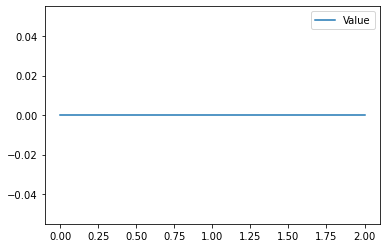

In [8]:
# Plot
prediction_df_p10.plot()

The above merely did the p10 values, now do the same for p50 and p90.

In [9]:
prediction_df_p50 = pd.DataFrame.from_dict(forecastResponse1['Forecast']['Predictions']['p50'])
prediction_df_p90 = pd.DataFrame.from_dict(forecastResponse1['Forecast']['Predictions']['p90'])

## Comparing the Prediction to Actual Results

After obtaining the dataframes the next task is to plot them together to determine the best fit.

In [10]:
# We start by creating a dataframe to house our content, here source will be which dataframe it came from
results_df = pd.DataFrame(columns=['timestamp', 'value', 'source'])

Import the observed values into the dataframe:

In [11]:
# for index, row in gt_df.iterrows():
#     clean_timestamp = dateutil.parser.parse(row['timestamp'])
#     results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['demand'], 'source': 'actual'} , ignore_index=True)

In [12]:
# To show the new dataframe
# results_df.head()

In [13]:
# Now add the P10, P50, and P90 Values
for index, row in prediction_df_p10.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'source': 'p10'} , ignore_index=True)
for index, row in prediction_df_p50.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'source': 'p50'} , ignore_index=True)
for index, row in prediction_df_p90.iterrows():
    clean_timestamp = dateutil.parser.parse(row['Timestamp'])
    results_df = results_df.append({'timestamp' : clean_timestamp , 'value' : row['Value'], 'source': 'p90'} , ignore_index=True)

In [14]:
results_df = results_df.fillna(0)

In [15]:
results_df = results_df.drop_duplicates()

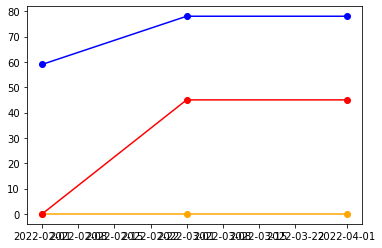

In [16]:
import matplotlib.pyplot as plt
for t, c in [('p10', 'orange'), ('p50', 'red'), ('p90', 'blue')]:
    c_df = results_df[results_df['source']==t]
    c_df = c_df.sort_values(by='timestamp')
    plt.plot(c_df['timestamp'], c_df['value'], 'o-', color= c, label=t)

Once you are done exploring this Forecast you can cleanup all the work that was done by executing the cells inside `Cleanup.ipynb` within this folder.